In [73]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [74]:
data=pd.read_csv("pollution_dataset.csv")

In [75]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor
...,...,...,...,...,...,...,...,...,...,...
4995,29.3,36.8,80.3,90.9,9.2,14.1,0.97,10.2,287,Moderate
4996,15.7,51.7,0.7,11.4,40.5,13.8,1.07,4.2,320,Good
4997,27.8,48.1,8.9,16.4,8.6,17.7,0.54,0.3,302,Moderate
4998,30.4,50.4,2.2,18.8,13.1,22.3,0.94,6.7,308,Moderate


In [76]:
data.fillna(data.median(), inplace=True)

/var/folders/h2/cwb0lyn52cg9bcwzl1902tjm0000gn/T/ipykernel_44115/421635383.py:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



/var/folders/h2/cwb0lyn52cg9bcwzl1902tjm0000gn/T/ipykernel_44115/2746791551.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



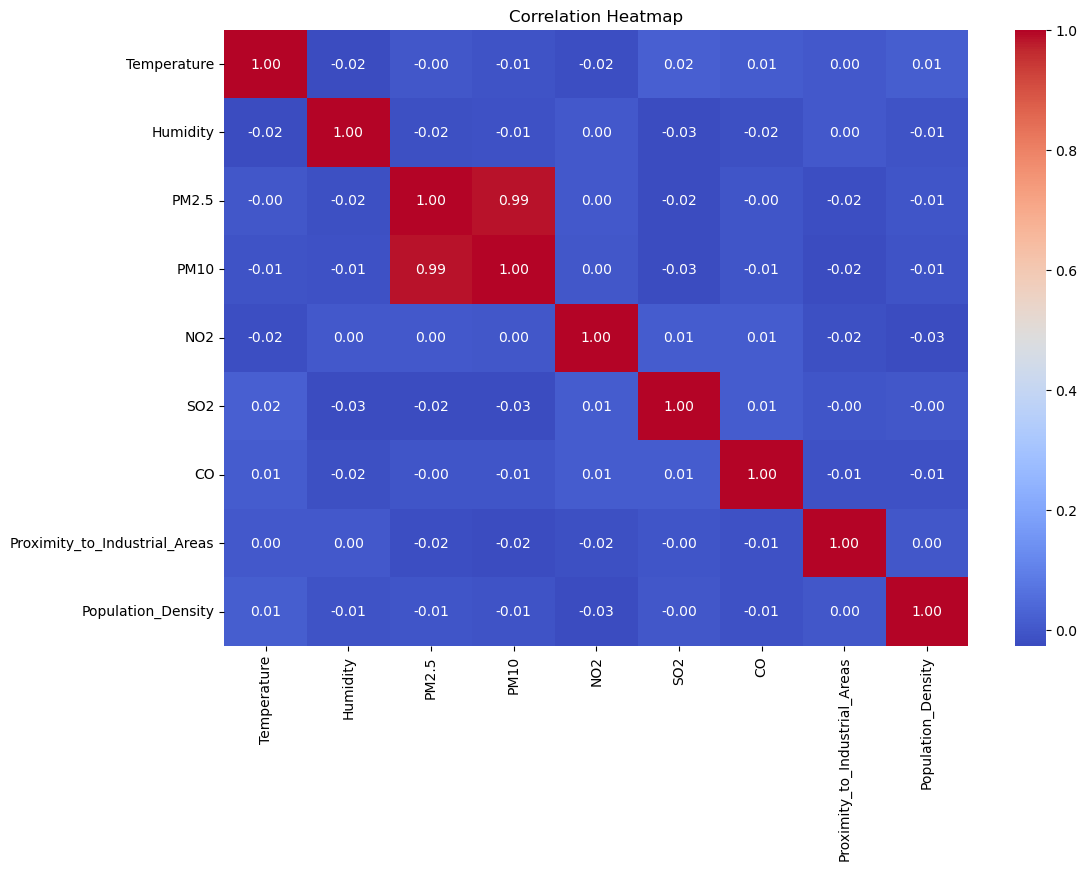

In [77]:
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

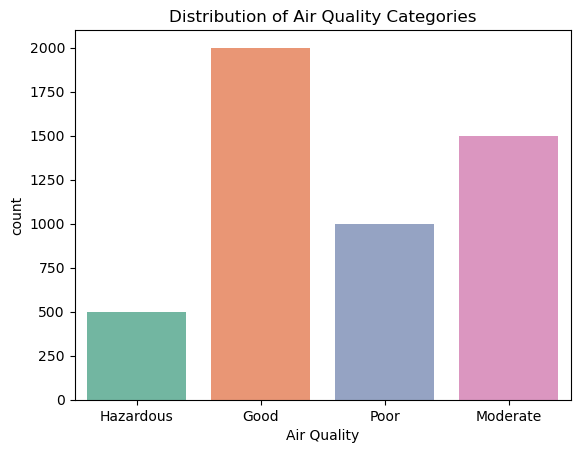

In [78]:
sns.countplot(x='Air Quality', data=data, palette='Set2')
plt.title("Distribution of Air Quality Categories")
plt.show()

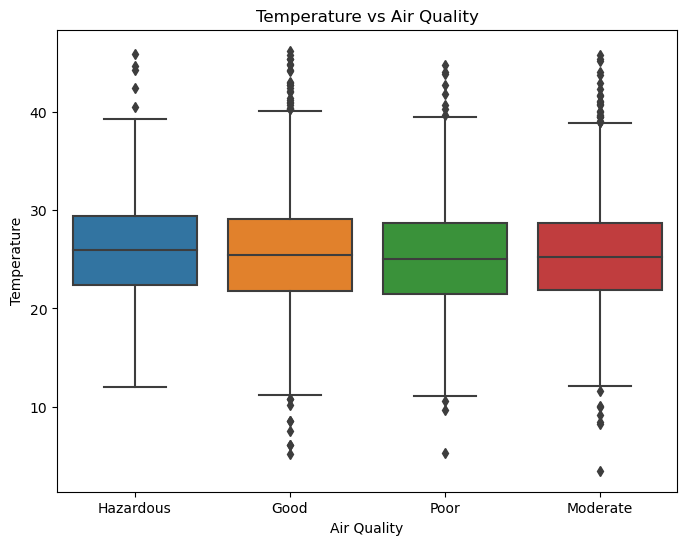

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Temperature', data=data)
plt.title("Temperature vs Air Quality")
plt.show()

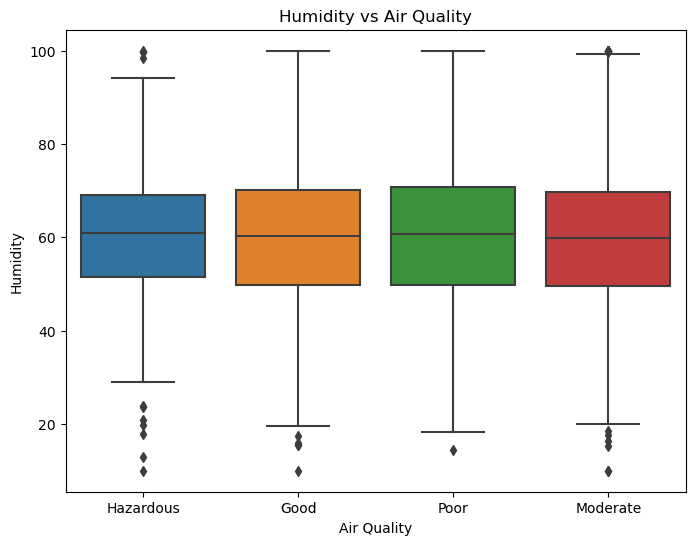

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Humidity', data=data)
plt.title("Humidity vs Air Quality")
plt.show()

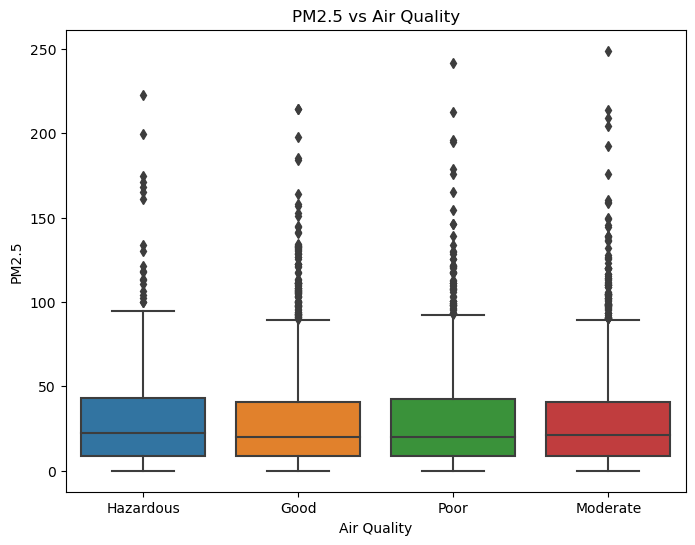

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='PM2.5', data=data)
plt.title("PM2.5 vs Air Quality")
plt.show()

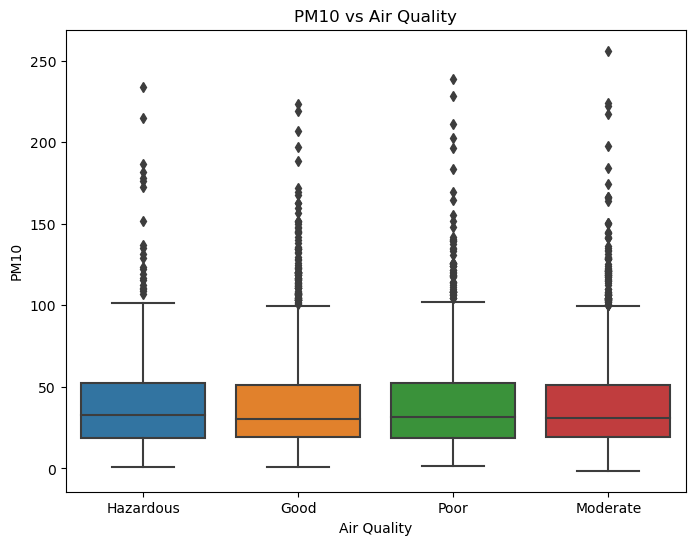

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='PM10', data=data)
plt.title("PM10 vs Air Quality")
plt.show()

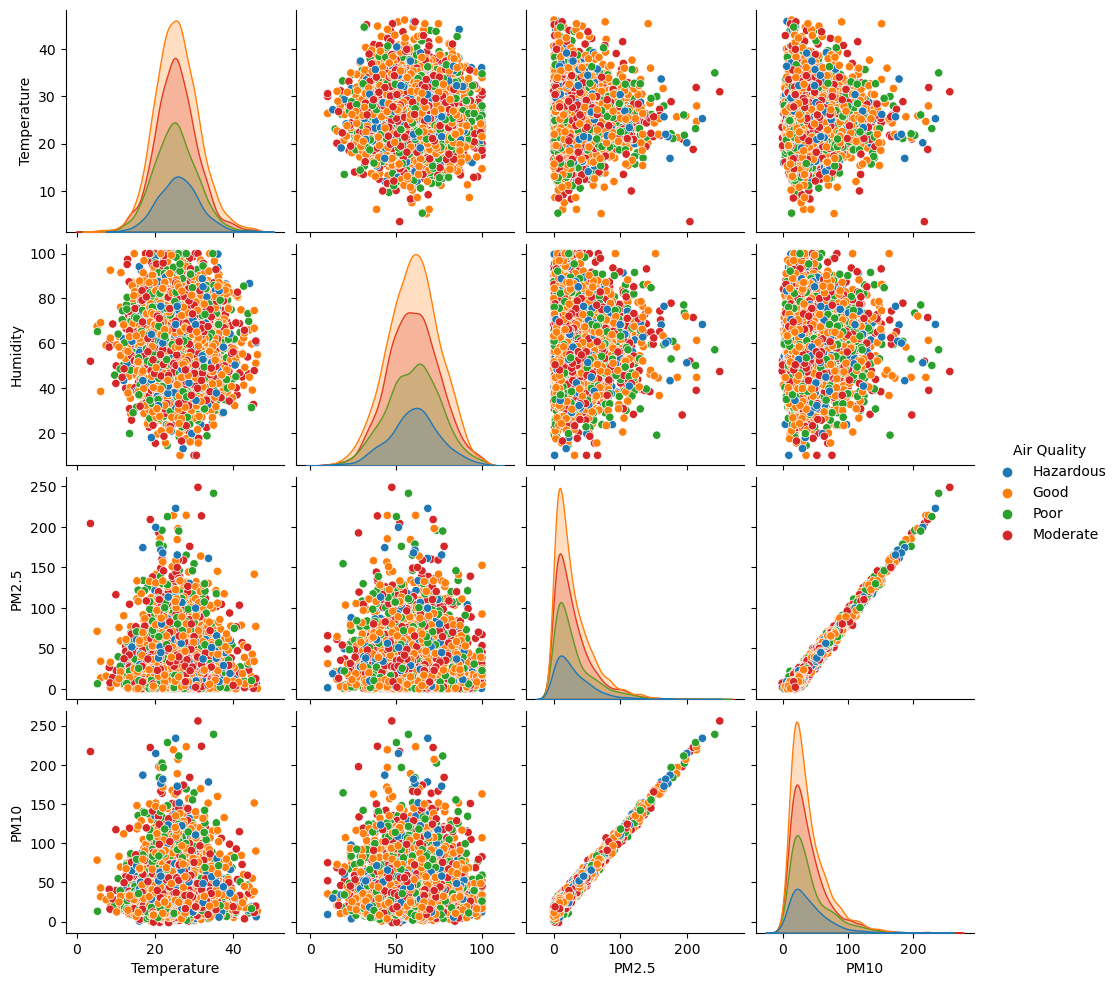

In [83]:
sns.pairplot(data[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'Air Quality']], hue='Air Quality')
plt.show()

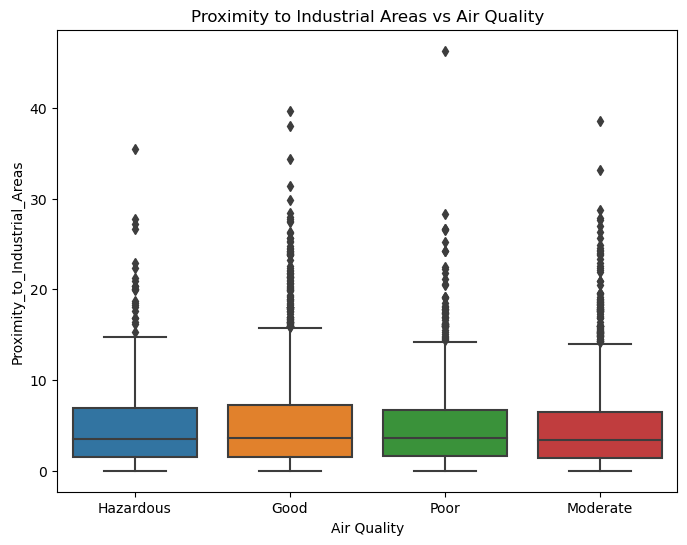

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Proximity_to_Industrial_Areas', data=data)
plt.title("Proximity to Industrial Areas vs Air Quality")
plt.show()

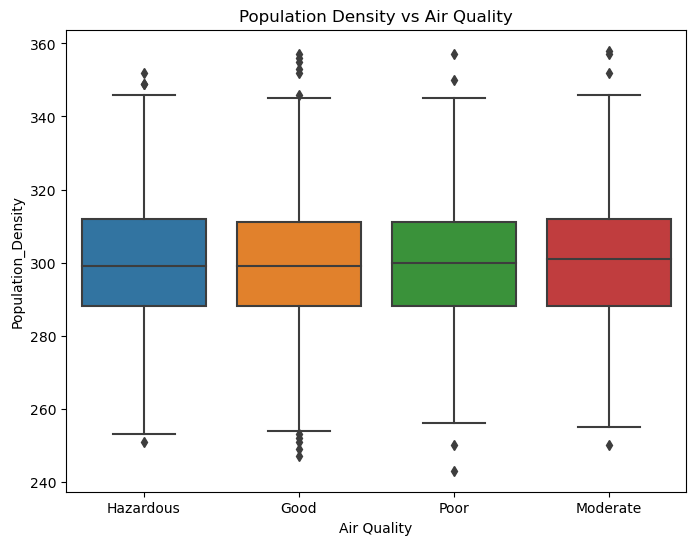

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Population_Density', data=data)
plt.title("Population Density vs Air Quality")
plt.show()


In [86]:
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='PM2.5', color='Air Quality',
                    title="3D Scatter Plot of Temperature, Humidity, and PM2.5")
fig.show()

In [87]:
quality_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Unhealthy for Sensitive Groups': 2,
    'Poor': 3,
    'Very Unhealthy': 4,
    'Hazardous': 5
}

In [88]:
data['Air Quality'] = data['Air Quality'].map(quality_mapping)

In [89]:
X = data.drop('Air Quality', axis=1)
y = data['Air Quality']


In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [92]:
model_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1991
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.908199
[LightGBM] [Info] Start training from score -1.219933
[LightGBM] [Info] Start training from score -1.584745
[LightGBM] [Info] Start training from score -2.338212


LGBMClassifier(random_state=42)

In [93]:
y_pred_lgb = model_lgb.predict(X_test)


In [94]:
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgb):.2f}")
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

LightGBM Accuracy: 0.36
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.67      0.49       387
           1       0.38      0.27      0.32       319
           3       0.15      0.07      0.09       180
           5       0.14      0.02      0.03       114

    accuracy                           0.36      1000
   macro avg       0.26      0.26      0.23      1000
weighted avg       0.31      0.36      0.31      1000



In [95]:
import joblib

In [98]:
import lightgbm as lgb
import joblib
from sklearn.preprocessing import StandardScaler


X = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']]
y = df['Air Quality']

# Encode the target (Air Quality) column into numerical labels
quality_mapping = {
    'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 
    'Poor': 3, 'Very Unhealthy': 4, 'Hazardous': 5
}
y = y.map(quality_mapping)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_scaled, y)

# Save the model and scaler
joblib.dump(model, 'lightgbm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 9
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -2.302585


['scaler.pkl']